In [1]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import easyocr
import torch
from pathlib import Path

/home/clara/miniconda3/envs/pytorch-bootcamp/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Initialize TrOCR
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

# EasyOCR for text detection
reader = easyocr.Reader(['nl'], gpu=torch.cuda.is_available())

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> 

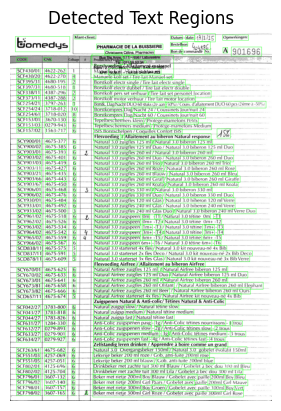

KeyboardInterrupt: 

In [3]:
from craft_ocr_flow import process_image
INPUT_FOLDER = Path("/home/clara/CodingProjects/order-form-extraction/images/")
OUTPUT_FOLDER = Path("/home/clara/CodingProjects/order-form-extraction/output/test_1")
image_path = INPUT_FOLDER / "2025-02-20 07-05_page_6.png"

process_image(image_path, OUTPUT_FOLDER, reader, model, processor)